In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import random
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from test import *
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv("data.csv",on_bad_lines='skip')
# Error tokenizing data. C error: Expected 2 fields in line 2810, saw 5
# Using on_bad_lines = skip or  or = False 

In [108]:
df.head()
# Read first 5 rows of the data.

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0


In [4]:
df.strength.unique()
# Have 3 unique values (0,1,2) for strenght

array([1, 2, 0], dtype=int64)

In [86]:
df.isnull().sum()
# Have only 1 NA value in password columns

TF-IDF    0
dtype: int64

In [6]:
df[df["password"].isnull()]
# 367579 index has NA

,password,strength
367579,NaN,0


In [7]:
df.dropna(inplace=True)
# Drop NA row.

In [8]:
df.isna().any()
# No more missing values.

password    False
strength    False
dtype: bool

<AxesSubplot:xlabel='strength', ylabel='count'>

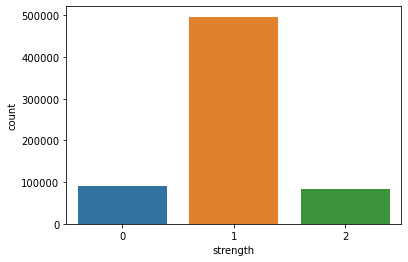

In [9]:
sns.countplot(df["strength"])
# Distribution of the strenght variable.

In [87]:
#password_tuple = np.array(df)
password_tuple

array([['kzde5577', 1],
       ['kzde5577', 1],
       ['visi7k1yr', 1],
       ...,
       ['mercury347', 1],
       ['alkaied719164', 1],
       ['gingyd9', 0]], dtype=object)

In [11]:
random.shuffle(password_tuple)
# Shuffling the tuple.

In [12]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]
# X's are our independent variable and y's are dependent variable

In [88]:
def word_divide_char(values):
    """
    Dividides to character given values  of password and returns as list.
    """
    character = []
    for v in values:
        character.append(v)
    return character


In [89]:
word_divide_char(x[2])

['v', 'i', 's', 'i', '7', 'k', '1', 'y', 'r']

In [16]:
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)
X = vectorizer.fit_transform(x)
# using TfidVectorizer to converting characters of passwords to matrix  of TF-IDF features. 

In [104]:
X.shape
# 

(669639, 129)

In [98]:
vectorizer.get_feature_names()[30:45]

['5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^']

In [107]:
first_document_vector = X[1]
#first_document_vector.T.todense()

In [28]:
df = pd.DataFrame(first_document_vector.T.todense(), index=vectorizer.get_feature_names(), columns=["TF-IDF"])

In [31]:
df[df["TF-IDF"] != 0]
# df.sort_values(by=["TF-IDF"], ascending=False) also can be used here to check password chars.

,TF-IDF
5,0.566875
7,0.591636
d,0.285764
e,0.221262
k,0.291906
z,0.335846


In [35]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.19)
# Spliting data for train and test with test size 0.19

In [37]:
X_test.shape

(127232, 129)

In [40]:
clf = LogisticRegression(multi_class="multinomial")
# Assign 'multinomial' to multi_class parameter. 

In [41]:
clf.fit(X_train, y_train)
# Fitting data to LogisticRegression

LogisticRegression(multi_class='multinomial')

In [43]:
y_pred = clf.predict(X_test)

In [45]:
cfm = confusion_matrix(y_test, y_pred)

In [48]:
print(cfm)
print(accuracy_score(y_test, y_pred))

[[ 5054 12172    24]
 [ 3533 88307  2311]
 [   54  4882 10895]]
0.8194164989939637


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39     17250
           1       0.84      0.94      0.89     94151
           2       0.82      0.69      0.75     15831

    accuracy                           0.82    127232
   macro avg       0.75      0.64      0.68    127232
weighted avg       0.80      0.82      0.80    127232



In [72]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test, y_test)
# Takes lot of time...

In [77]:
grid_result.best_params_
# Best params for this model.

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [78]:
clf = LogisticRegression(multi_class="multinomial", **grid_result.best_params_)
# Changing params with params we found.

In [79]:
clf.fit(X_train, y_train)
# Fitting again.

LogisticRegression(C=10, multi_class='multinomial', solver='newton-cg')

In [80]:
y_pred = clf.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.31      0.40     17250
           1       0.84      0.93      0.88     94151
           2       0.82      0.70      0.75     15831

    accuracy                           0.82    127232
   macro avg       0.75      0.65      0.68    127232
weighted avg       0.80      0.82      0.80    127232



In [82]:
print(accuracy_score(y_test, y_pred))

0.8197308853118712


     Accuracy slightly increased.

    Dataset taken from https://www.udemy.com/course/data-science-real-world-projects-in-python-x/
    course.
    My first project about NLP for understand TfidVectorizer algorithm.